# Premier League 2024
![image](logo.jpg)
## Business Understanding
We’re looking to understand how teams performed across several metrics: **goals scored**, **goals conceded**, **wins**, **draws**, **losses**, **points**, **goal difference**, and **rank**.

## Data Understanding

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('PremierLeagueSeason2024.csv')
df.head()

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,179,66,55,12,9,177,113,1
1,Liverpool,154,83,44,19,13,151,71,2
2,Arsenal,146,68,46,12,18,150,78,3
3,Manchester United,130,102,39,17,20,134,28,4
4,Chelsea,135,99,37,19,20,130,36,5


## Data Preparation
Check the dataset for missing values and ensure that columns have appropriate data types.

In [3]:
# Check for missing values
display(df.isnull().sum())

# Ensure all data types are correct
display(df.dtypes)

team               0
goals_scored       0
goals_conceded     0
wins               0
draws              0
losses             0
points             0
goal_difference    0
rank               0
dtype: int64

team               object
goals_scored        int64
goals_conceded      int64
wins                int64
draws               int64
losses              int64
points              int64
goal_difference     int64
rank                int64
dtype: object

## Exploratory Data Analysis (EDA)
### 1. Top Performers Based on Points

We will start by visualizing the top 5 teams based on points.

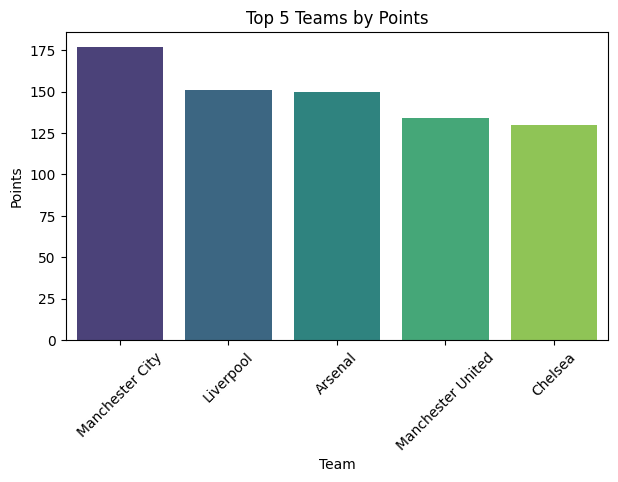

In [4]:
# Sort by points and select top 5 teams
top_teams = df.sort_values(by='points', ascending=False).head(5)

# Plotting the top 5 teams
plt.figure(figsize=(7,4))
sns.barplot(x='team', y='points', data=top_teams, palette='viridis')
plt.title('Top 5 Teams by Points')
plt.ylabel('Points')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.show()


### 2. Goal Difference vs Rank
We can now explore how the goal difference correlates with team rank.

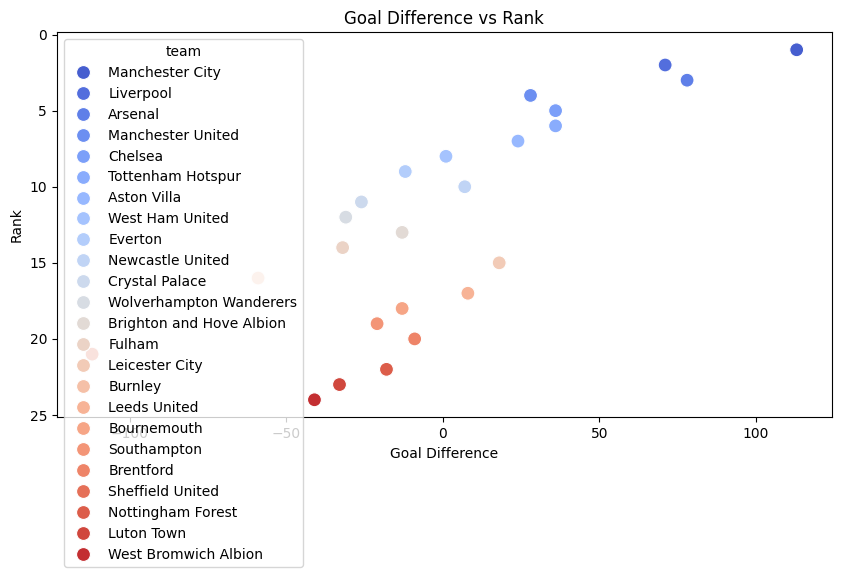

In [5]:
# Scatter plot of Goal Difference vs Rank
plt.figure(figsize=(10,5))
sns.scatterplot(x='goal_difference', y='rank', data=df, hue='team', palette='coolwarm', s=100)
plt.title('Goal Difference vs Rank')
plt.xlabel('Goal Difference')
plt.ylabel('Rank')
plt.gca().invert_yaxis()
plt.show()


### 3. Goals Scored vs Goals Conceded
A comparison between goals scored and goals conceded provides insights into the offensive and defensive strengths.

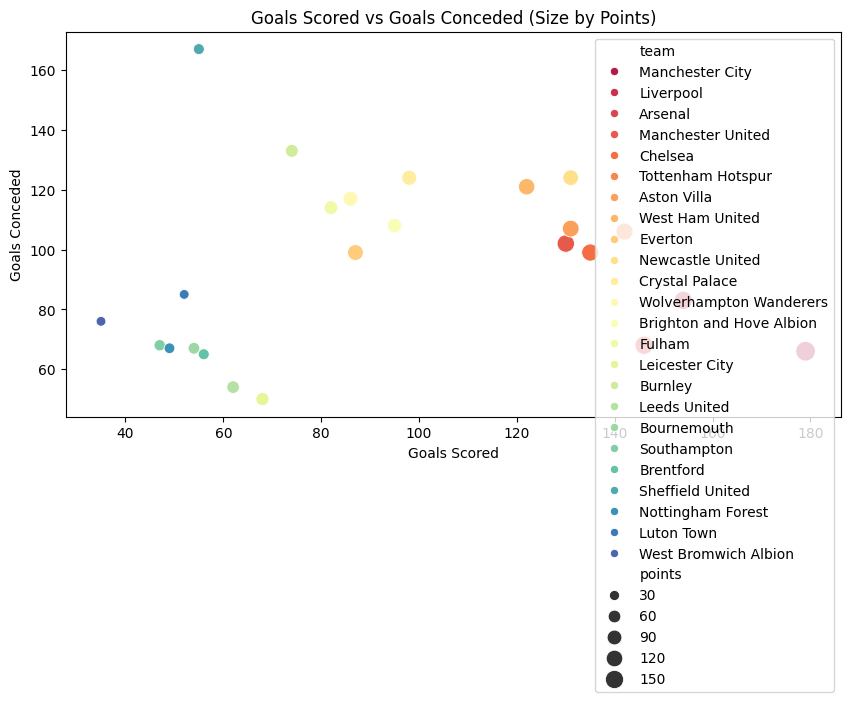

In [6]:
# Goals Scored vs Goals Conceded
plt.figure(figsize=(10,5))
sns.scatterplot(x='goals_scored', y='goals_conceded', data=df, hue='team', size='points', sizes=(50, 200), palette='Spectral')
plt.title('Goals Scored vs Goals Conceded (Size by Points)')
plt.xlabel('Goals Scored')
plt.ylabel('Goals Conceded')
plt.show()

### 4. Wins, Draws and Losses Breakdown
We’ll visualize a breakdown of wins, draws, and losses across all teams.

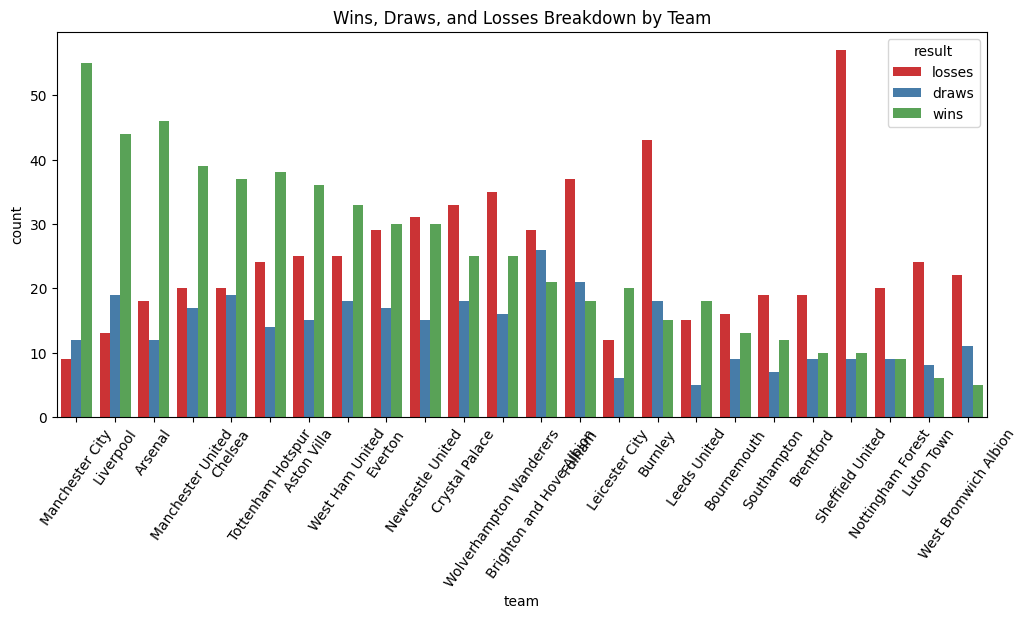

In [7]:
# Create a stacked bar chart for wins, draws, and losses
df_melted = df.melt(id_vars='team', value_vars=['losses', 'draws', 'wins'], var_name='result', value_name='count')

plt.figure(figsize=(12,5))
sns.barplot(x='team', y='count', hue='result', data=df_melted, palette='Set1')
plt.title('Wins, Draws, and Losses Breakdown by Team')
plt.xticks(rotation=55)
plt.show()


### 5. Mid-Table Performance Analysis
Visualize the teams ranked in the middle to better understand how they performed.

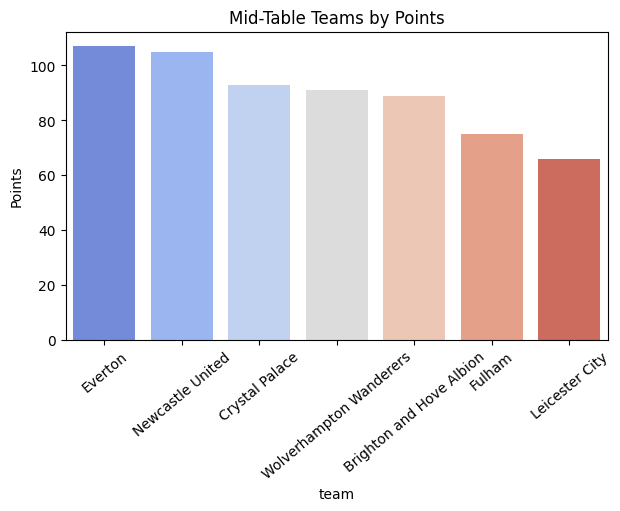

In [8]:
# Select mid-ranked teams (Rank 9 to 15)
mid_teams = df[(df['rank'] >= 9) & (df['rank'] <= 15)]

# Plotting mid-ranked teams
plt.figure(figsize=(7,4))
sns.barplot(x='team', y='points', data=mid_teams, palette='coolwarm')
plt.title('Mid-Table Teams by Points')
plt.ylabel('Points')
plt.xticks(rotation=40)
plt.show()

### 6. Bottom Teams' Struggles
We will visualize the bottom-ranked teams and focus on losses and goals conceded.

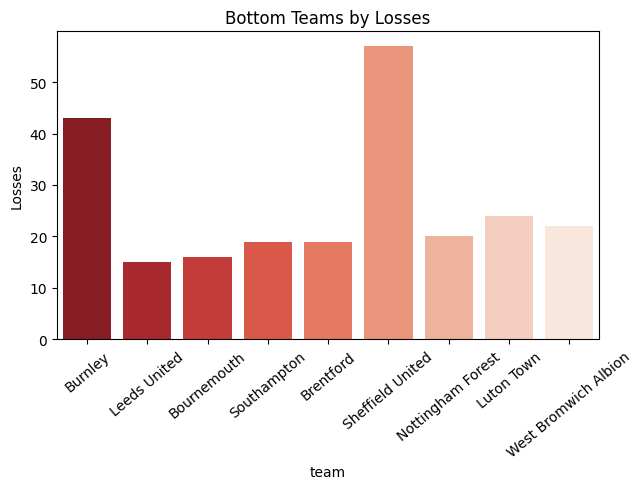

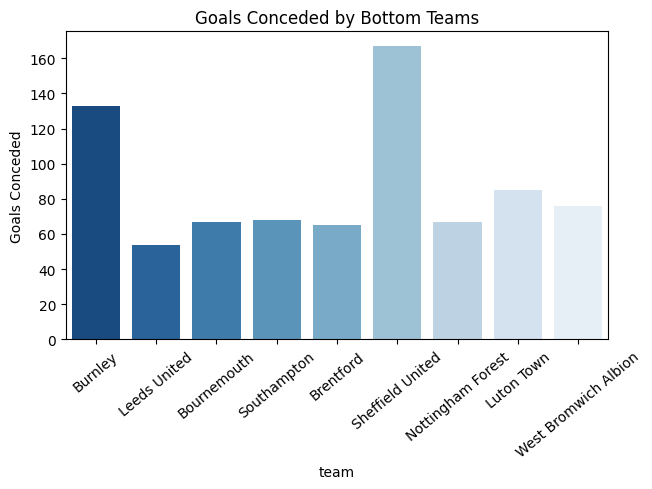

In [9]:
# Select bottom teams (Rank 16 and below)
bottom_teams = df[df['rank'] >= 16]

# Plotting bottom teams
plt.figure(figsize=(7, 4))
sns.barplot(x='team', y='losses', data=bottom_teams, palette='Reds_r')
plt.title('Bottom Teams by Losses')
plt.ylabel('Losses')
plt.xticks(rotation=40)
plt.show()

# Plotting goals conceded for bottom teams
plt.figure(figsize=(7,4))
sns.barplot(x='team', y='goals_conceded', data=bottom_teams, palette='Blues_r')
plt.title('Goals Conceded by Bottom Teams')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=40)
plt.show()

# Conclusions:

#### 1. Top Teams Dominated the League
* Manchester City stood out with a commanding performance, earning the highest points (177) with an impressive goal difference of 113.
* Liverpool and Arsenal followed closely, showing strong offensive power, scoring 154 and 146 goals respectively, although their defensive records were weaker than Manchester City’s.
* The top 5 teams (Manchester City, Liverpool, Arsenal, Manchester United, Chelsea) consistently scored high points and had a positive goal difference, highlighting their balance in both attack and defense.

#### 2. Goal Difference Strongly Correlates with Rank
* Teams with a high goal difference ranked higher in the league. For instance, Manchester City's goal difference of 113 helped them secure the top rank.
* Conversely, teams like Sheffield United and West Bromwich Albion had significantly negative goal differences (-112 and -41, respectively), which corresponded to their low ranks.

#### 3. Balance Between Goals Scored and Conceded Influences Performance
* Teams like Manchester United and Chelsea scored a decent number of goals but conceded many more than top teams, resulting in lower ranks despite their attacking power.
* Sheffield United and West Bromwich Albion struggled heavily on defense, conceding 167 and 76 goals respectively, which contributed to their poor rankings.

#### 4. Mid-Table Teams’ Performance
* Mid-ranked teams such as Everton, Newcastle United and Crystal Palace showed moderate results, with points ranging between 89 and 107.
* These teams tended to score fewer goals than the top teams and had more draws, which affected their ability to climb higher in the rankings.

#### 5. Bottom Teams Struggled with High Losses and Defensive Issues
* Teams ranked 16th and below consistently underperformed, largely due to their inability to maintain defensive discipline. Sheffield United was the most striking example, conceding 167 goals and losing 57 matches.
* Luton Town and Nottingham Forest also had poor defensive records and struggled to secure wins, which kept them near the bottom of the table.

#### 6. Wins and Draws Played a Key Role
* The top teams had a large number of wins (e.g., Manchester City with 55 wins), while bottom teams like West Bromwich Albion and Luton Town struggled to win, achieving only 5 and 6 wins respectively.
* The higher-ranked teams also managed to avoid losses by securing more draws, which allowed them to accumulate points and avoid slipping down the table.

#### 7. Variations in Goal Scoring
* Teams like Manchester City and Liverpool showcased their offensive firepower with 179 and 154 goals, setting them apart from the rest of the league.
* Bottom teams such as Bournemouth and Brentford scored significantly fewer goals (54 and 56), reflecting their struggle to compete with stronger teams.

#### 8. Defensive Stability Contributed to Success
* Teams with better defensive records, such as Manchester City (66 goals conceded) and Leicester City (50 goals conceded), were able to remain competitive and secure higher ranks.
* Conversely, teams like Sheffield United and Burnley with poor defensive records failed to maintain their positions, conceding over 100 goals each.

#### 9. Bottom Teams’ Limited Points
* Teams ranked 16th to 24th all ended up with fewer than 60 points, with West Bromwich Albion and Luton Town tying for the lowest with 26 points. This shows a clear gap between mid-table teams and those at the bottom.